In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

d_out = np.random.randn(4, 3)
d_out

array([[-1.33807731,  0.42478951,  1.05111298],
       [-0.54916645,  0.57783537, -0.39757769],
       [ 0.33873115, -2.19224612, -2.60699134],
       [ 0.59517254, -0.51274205,  0.55131178]])

In [2]:
B = np.random.rand(1, 3)
B

array([[0.22872563, 0.71123973, 0.9419253 ]])

In [3]:
d_out + 5

array([[3.66192269, 5.42478951, 6.05111298],
       [4.45083355, 5.57783537, 4.60242231],
       [5.33873115, 2.80775388, 2.39300866],
       [5.59517254, 4.48725795, 5.55131178]])

In [4]:
d_out + B

array([[-1.10935168,  1.13602924,  1.99303827],
       [-0.32044082,  1.28907509,  0.54434761],
       [ 0.56745678, -1.48100639, -1.66506605],
       [ 0.82389817,  0.19849768,  1.49323707]])

In [5]:
r =  np.ones_like(B) * d_out
r

array([[-1.33807731,  0.42478951,  1.05111298],
       [-0.54916645,  0.57783537, -0.39757769],
       [ 0.33873115, -2.19224612, -2.60699134],
       [ 0.59517254, -0.51274205,  0.55131178]])

In [6]:
r.sum(axis=0).reshape(1, B.shape[1])

array([[-0.95334007, -1.70236329, -1.40214427]])

In [7]:
weight = np.random.randn(5, 4)
biais = np.random.randn(1, 4)

In [8]:
params = []
params.append(weight)
params.append(biais)
params

[array([[ 0.10928022,  0.52732969,  1.115538  ,  0.68919923],
        [ 0.10017813,  0.79238695,  1.68524817, -0.46508893],
        [-0.1690714 , -0.3026148 , -1.05637299, -1.77589906],
        [ 0.09543905,  0.93302939,  0.39115095,  0.23622747],
        [-0.52695245,  0.1505414 , -0.98125058, -0.5927175 ]]),
 array([[-0.13215517, -0.55939219,  0.98538867, -0.32360929]])]

In [9]:
class Boite():

  def __init__(self):
    pass

  def forward(self, inputs):
    self.inputs = inputs
    self.output = self.operation()
    return self.output

  def backward(self, derivee_output, output = None, parametre_donnee= None, input_couche = None ):
    self.output = output
    self.params = parametre_donnee
    self.inputs = input_couche

    assert derivee_output.shape == self.output.shape, f"La derivee_output reçue a un shape {derivee_output.shape} et different du shape de output : {self.output.shape}"

    self.derivee_inputs = self.gradient(derivee_output)
    assert self.derivee_inputs.shape == self.inputs.shape, f"La derivee_input calculée a un shape {self.derivee_inputs.shape } et different du shape de inputs : {self.inputs.shape}"

    return self.derivee_inputs


  def operation(self):
    pass

  def gradient(self, derivee_output):
    pass

In [10]:
class BoiteParam():

  def __init__(self, param):
    self.param = param

  def forward(self, inputs):
    self.inputs = inputs
    self.output = self.operation()
    return self.output

  def backward(self, derivee_output,  output = None, parametre_donnee= None, input_couche = None):
    self.output = output
    self.param = parametre_donnee
    self.inputs = input_couche

    assert derivee_output.shape == self.output.shape, f"La derivee_output reçue a un shape {derivee_output.shape} et different du shape de output : {self.output}"

    self.derivee_inputs = self.gradient(derivee_output)
    assert self.derivee_inputs.shape == self.inputs.shape, f"La derivee_input calculée a un shape {self.derivee_inputs.shape } et different du shape de inputs : {self.inputs.shape}"

    self.derivee_param = self.gradient_param(derivee_output)
    assert self.derivee_param.shape == self.param.shape, f"La derivee de param a un shape {self.derivee_param.shape} et different du shape de param : {self.param.shape}"

    return self.derivee_inputs


  def operation(self):
    pass

  def gradient(self, derivee_output):
    pass


  def gradient_param(self, derivee_output):
    pass

In [11]:
class Dot(BoiteParam):

  def __init__(self, weights):
    super().__init__(weights)

  def operation(self):
    return np.dot(self.inputs, self.param)

  def gradient(self, derivee_output):
    return np.dot( derivee_output, self.param.T)

  def gradient_param(self, derivee_output):
    return np.dot(self.inputs.T, derivee_output)

  def __repr__(self):
    return "DotProduct"

In [12]:
class Add(BoiteParam):

  def __init__(self, biais):
    super().__init__(biais)

  def operation(self):
    return self.inputs + self.param

  def gradient(self, derivee_output):
    return np.ones_like(self.inputs) * derivee_output

  def gradient_param(self, derivee_output):
    r =  np.ones_like(self.param) * derivee_output
    return r.sum(axis=0).reshape(1, self.param.shape[1])

  def __repr__(self):
    return "AddBiais"

In [13]:
class Sigmoid(Boite):

  def __init__(self):
    super().__init__()

  def operation(self):
    return 1 / (1 + np.exp(-1 * self.inputs))

  def gradient(self, derivee_output):
    return self.output * (1 - self.output) * derivee_output

  def __repr__(self):
    return "sigmoid"

In [14]:
class Loss():

  def __init__(self):
    pass

  def forward(self, prediction, target):
    assert prediction.shape == target.shape, f"Prediction shape {prediction.shape}  Target shape {target.shape}"
    self.prediction = prediction
    self.target = target
    loss = np.mean((self.target - self.prediction) ** 2)
    return loss

  def backward(self, prediction, target):
    self.target = target
    self.prediction = prediction

    self.loss_derivee = -2 * (self.target - self.prediction)
    assert self.loss_derivee.shape == self.prediction.shape, f"La derivee du loss un shape {self.loss_derivee.shape } et different du shape de Prediction : {self.prediction.shape}"

    return self.loss_derivee

In [15]:
class Dense():

  def __init__(self, neurons, activation=None):
    self.neurons = neurons
    self.activation = activation
    self.params = []
    self.suite = []
    self.initialisation = True



  def build(self, inputs):
    # weights initialization
    np.random.seed(42)

    self.weights = np.random.randn(inputs.shape[1], self.neurons)
    self.biais = np.random.randn(1, self.neurons)

    self.params.append(self.weights)
    self.params.append(self.biais)
    # construction de la suite d'opération
    self.suite = [Dot(weights=self.params[0]), Add(biais=self.params[1])]
    if self.activation:
      self.suite.append(self.activation)


  def forward(self, inputs):
    if self.initialisation:
      self.build(inputs)
      self.initialisation = False

    for boite in self.suite:
      inputs = boite.forward(inputs)

      self.output = inputs

    return self.output


  def backward(self, derivee_output, output_dot=None, output_biais=None, output_sigmoid=None, parms_dot=None, params_biais=None, input_dot_level = None, input_biais_level= None, input_sigmoid_level= None):
    input = {'output': {'DotProduct': output_dot,
                       'AddBiais': output_biais,
                       'sigmoid': output_sigmoid},
            'params': {'DotProduct': parms_dot,
                       'AddBiais': params_biais},
             'input': {'DotProduct': input_dot_level, # input au niveau du dot
                       'AddBiais': input_biais_level, #input au niveau du add
                       'sigmoid': input_sigmoid_level} #input au niveau du sigma
            }
    for boite in reversed(self.suite):
        output = input['output'][f"{boite}"]
        input_layer = input['input'][f"{boite}"]

        assert derivee_output.shape == output.shape

        if f"{boite}" != "sigmoid": #boite egale a Dot ou Biais
          params = input['params'][f"{boite}"]
        else:
          params = None

        assert derivee_output.shape == output.shape
        derivee_output = boite.backward(derivee_output, output, parametre_donnee=params, input_couche = input_layer )


    derivee_inputs = derivee_output

    #comme executer avant on peut la recuperer
    self.get_layer_gradients()

    return derivee_inputs

  def get_layer_gradients(self):

    self.derivee_params = []

    for boite in self.suite:
      if issubclass(boite.__class__, BoiteParam):
        self.derivee_params.append(boite.derivee_param)



  def __repr__(self):
    r = f"DenseLayer(neurons={self.neurons})"
    if self.activation:
      r += " avec Sigmoid"

    return r

In [16]:
sigmoid = Sigmoid()
couche = Dense(neurons=2, activation=sigmoid)

In [17]:
X = np.array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])
Y = np.random.randn(4, 1)

In [18]:
couche.suite

[]

In [19]:
couche.forward(X)

array([[0.99320003, 0.99604286],
       [0.99912347, 0.99968533],
       [0.42276305, 0.97817014],
       [0.97978765, 0.99941659]])

In [20]:
couche.suite

[DotProduct, AddBiais, sigmoid]

In [21]:
#recuperation output apres le dot
couche.suite[0].output

array([[ 3.40480067,  4.76083488],
       [ 5.45945268,  7.29622903],
       [-1.89065381,  3.03497035],
       [ 2.30182919,  6.67860145]])

In [22]:
#recuperation des parametres
couche.suite[0].param


array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696]])

In [23]:
couche.initialisation #comme on a lancer une fois initialisation doit etre a false

False

In [24]:
couche.suite[0].inputs #on peut recuperer l'input qui entre dans dot

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [25]:
#on peut recuperer l'input qui entre dans biais et donc l'output de dot
if np.array_equal(couche.suite[1].inputs, couche.suite[0].output):
    print('input biais =', couche.suite[1].inputs, "est egale a output de dot", couche.suite[0].output)
else:
    print('input biais =', couche.suite[1].inputs, "n'est pas egale a output de dot", couche.suite[0].output)

input biais = [[ 3.40480067  4.76083488]
 [ 5.45945268  7.29622903]
 [-1.89065381  3.03497035]
 [ 2.30182919  6.67860145]] est egale a output de dot [[ 3.40480067  4.76083488]
 [ 5.45945268  7.29622903]
 [-1.89065381  3.03497035]
 [ 2.30182919  6.67860145]]


In [26]:
#couche.suite[0].derivee_inputs #comme pas de bakward fait precedemment alors err

In [27]:
# backward -> il faut que la derivee de l'output doit etre egale à l'output : output shape : (4,2) donc je dois donner un output de la forme (4,2)
deriveproduitprecedent_output_pour_bakcward = np.random.randn(couche.forward(X).shape[0], couche.forward(X).shape[1])
deriveproduitprecedent_output_pour_bakcward

array([[-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024],
       [-1.72491783, -0.56228753]])

In [28]:
couche.suite[0].inputs

array([[ 2,  3, -2],
       [ 4,  5, -1],
       [-5,  2,  3],
       [ 0,  5,  4]])

In [29]:
couche.backward(deriveproduitprecedent_output_pour_bakcward,
                output_dot= couche.suite[0].output,
                output_biais= couche.suite[1].output,
                output_sigmoid= couche.suite[2].output,
                parms_dot= couche.suite[0].param,
                params_biais= couche.suite[1].param,
                input_dot_level = X,
                input_biais_level = couche.suite[1].inputs,
                input_sigmoid_level = couche.suite[2].inputs)

array([[-0.00187061,  0.00120335,  0.00024173],
       [-0.00018133, -0.00048599,  0.00012933],
       [ 0.03497832, -0.02397904, -0.00426045],
       [-0.0169224 , -0.02262434,  0.00807543]])

In [30]:
couche.suite[0].derivee_inputs # la ca fonctionne on a donc la derrivée par rapport a l'input et donc ici dans notre cas par rapport a x c'est donc egale a W_transposé * le produit de ce qui c'est passé avant . a note de la meme shape que l'input

array([[-0.00187061,  0.00120335,  0.00024173],
       [-0.00018133, -0.00048599,  0.00012933],
       [ 0.03497832, -0.02397904, -0.00426045],
       [-0.0169224 , -0.02262434,  0.00807543]])

In [31]:
from copy import deepcopy
import pdb

class Model():

  def __init__(self, layers):
    self.layers = layers
    self.compiled = False
    self.output_couche={}
    self.params_couche={}
    self.couche_numero = 0

  def forward(self, inputs, validation = False):

    for layer in self.layers:
      # import pdb; pdb.set_trace()
      #recuperation des outputs parms et input apres chaque boite
      layer_key = f"{layer}_couche numero_{self.couche_numero}"
      self.output_couche[layer_key] = {
            "output": {},
            "params": {},
            "input": {}
        }
      if validation == False:
        #insertion de l'input pr le dot
        self.output_couche[layer_key]["input"]["dot_level"] = inputs

      #on fait notre forward
      inputs = layer.forward(inputs)

      if validation == False:
        self.output_couche[layer_key]["input"]["biais_level"] = layer.suite[0].output
        self.output_couche[layer_key]["input"]["sigmoid_level"] = layer.suite[1].output

        self.output_couche[layer_key]["output"]["dot"] = layer.suite[0].output
        self.output_couche[layer_key]["output"]["biais"] = layer.suite[1].output
        # Recuperation output de la boite sigmoid car pas obligatoire
        if len(layer.suite) == 3:
              self.output_couche[layer_key]["output"]["sigmoid"] = layer.suite[2].output
              self.output_couche[layer_key]["input"]["biais"] = layer.suite[1].output

        # Recuperation des parametres de chaque boite
        self.output_couche[layer_key]["params"]["dot"] = layer.suite[0].param
        self.output_couche[layer_key]["params"]["biais"] = layer.suite[1].param

      self.couche_numero += 1
      self.output = inputs

    return self.output




  def backward(self, loss_derivee):


    self.couche_numero = (len(self.layers) - 1) #car 0 compte donc si 3 elements on a 0 1 2 et non 123 ## on commence de la derniere couche et on termine a la premiere
    for layer in reversed(self.layers):

      layer_key = f"{layer}_couche numero_{self.couche_numero}"
      nombre_boite = len(self.output_couche[layer_key]["output"])

      output = self.output_couche[layer_key]["output"]
      params = self.output_couche[layer_key]["params"]
      input = self.output_couche[layer_key]["input"]

      if nombre_boite == 3:
        assert loss_derivee.shape == output["sigmoid"].shape
        loss_derivee = layer.backward(loss_derivee, output_dot=output["dot"], output_biais = output["biais"], output_sigmoid = output["sigmoid"], params_biais = params["biais"], parms_dot = params["dot"], input_dot_level = input["dot_level"], input_biais_level= input["biais_level"], input_sigmoid_level= input["sigmoid_level"] )
      elif nombre_boite == 2:
        assert loss_derivee.shape == output["biais"].shape
        loss_derivee = layer.backward(loss_derivee, output_dot=output["dot"], output_biais = output["biais"], params_biais = params["biais"], parms_dot = params["dot"], input_dot_level = input["dot_level"], input_biais_level= input["biais_level"], input_sigmoid_level= input["sigmoid_level"] )

      self.couche_numero -= 1




    return None

  def get_params(self):
    for layer in self.layers:
      yield from layer.params


  def get_derivee_params(self):
    for layer in self.layers:
      yield from layer.derivee_params


  def update(self):

    for (param, derivee_param) in zip(self.get_params(), self.get_derivee_params()):
      assert param.shape == derivee_param.shape
      param -=   self.learning_rate * derivee_param


  def compile(self, loss, learning_rate):
    self.loss = loss
    self.learning_rate = learning_rate
    self.compiled = True


  def fit(self, X, Y, epochs, validation_data=None):

    if validation_data:
      assert len(validation_data) == 2
      assert validation_data[0].shape[1] == X.shape[1]
      assert validation_data[1].shape[1] == Y.shape[1]

    self.history = {"loss":[]}
    if validation_data:
      self.history['val_loss'] = []


    if not self.compiled:
      raise NotImplementedError("Pas de loss et de learning_rate: Compilez")

    for epoch in range(epochs):

      # forward pass
      predictions = model.forward(X)
      loss = self.loss
      err_prediction = loss.forward(predictions, Y)
      self.history['loss'].append(err_prediction)


      # val loss
      if validation_data:
        val_preds = model.forward(validation_data[0], validation = True)
        val_loss = self.loss
        val_err_prediction = val_loss.forward(val_preds, validation_data[1])
        self.history['val_loss'].append(val_err_prediction)

      log = f'Epoch {epoch+1} .............. loss : {err_prediction}'
      if validation_data:
        log += f"  ....val_loss : {val_err_prediction}"
      print(log)



      # backward pass
      loss_derivee = loss.backward(target = Y, prediction = predictions)
      self.backward(loss_derivee)

      # update
      self.update()

    return self.history

  def save_model(self, file):
    model_save = deepcopy(self)

    import pickle
    with open(file, "wb") as f:
      pickle.dump(model_save, f)


  def __repr__(self):

    r = "Layers ................."
    for layer in self.layers:
      r += f" \n {str(layer)}"

    return r

#forward

In [32]:
X.shape

(4, 3)

In [33]:
layers = [ Dense(neurons=3, activation=sigmoid),
          Dense(neurons=5, activation=sigmoid),
       Dense(neurons=1)]

In [34]:
model = Model(layers)
model

Layers ................. 
 DenseLayer(neurons=3) avec Sigmoid 
 DenseLayer(neurons=5) avec Sigmoid 
 DenseLayer(neurons=1)

In [35]:
model.forward(X)

array([[0.84993545],
       [0.84362513],
       [1.22210677],
       [1.22425779]])

In [36]:
model.layers[0].initialisation # une premiere execution a ete faite donc initialisation doit passer a false

False

In [37]:
model.layers[0].params

[array([[ 0.49671415, -0.1382643 ,  0.64768854],
        [ 1.52302986, -0.23415337, -0.23413696],
        [ 1.57921282,  0.76743473, -0.46947439]]),
 array([[ 0.54256004, -0.46341769, -0.46572975]])]

In [38]:
model.layers[1].params

[array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337],
        [-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
        [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783]]),
 array([[-0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ]])]

In [39]:
params= model.get_params()

In [40]:
next(params)

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439]])

In [41]:
for i in model.get_params():
  print('parametre', i)

parametre [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]]
parametre [[ 0.54256004 -0.46341769 -0.46572975]]
parametre [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]]
parametre [[-0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037 ]]
parametre [[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]
 [-0.23415337]]
parametre [[-0.23413696]]


#backward

In [42]:
loss_derivee = np.random.randn(4, 1)
loss_derivee

array([[ 1.57921282],
       [ 0.76743473],
       [-0.46947439],
       [ 0.54256004]])

In [43]:
model.backward(loss_derivee)

In [44]:
model.layers

[DenseLayer(neurons=3) avec Sigmoid,
 DenseLayer(neurons=5) avec Sigmoid,
 DenseLayer(neurons=1)]

In [45]:
model.layers[0].derivee_params

[array([[ 0.09744344, -0.08618553, -0.64336403],
        [ 0.13698274, -0.11830289, -0.93484694],
        [-0.09526242, -0.01875007,  0.38958693]]),
 array([[ 0.04528266, -0.02121019, -0.25762364]])]

In [46]:
model.layers[1].derivee_params

[array([[ 0.27708152, -0.05174736,  0.27472495,  0.73140384, -0.02763427],
        [ 0.01624539, -0.0034003 ,  0.01676576,  0.04383442, -0.00135655],
        [ 0.2135732 , -0.03921063,  0.21194219,  0.56124601, -0.0207439 ]]),
 array([[ 0.28624623, -0.05341832,  0.28395946,  0.7555249 , -0.02849731]])]

In [47]:
for i in model.get_derivee_params():
  print('derivee de parametre', i)

derivee de parametre [[ 0.09744344 -0.08618553 -0.64336403]
 [ 0.13698274 -0.11830289 -0.93484694]
 [-0.09526242 -0.01875007  0.38958693]]
derivee de parametre [[ 0.04528266 -0.02121019 -0.25762364]]
derivee de parametre [[ 0.27708152 -0.05174736  0.27472495  0.73140384 -0.02763427]
 [ 0.01624539 -0.0034003   0.01676576  0.04383442 -0.00135655]
 [ 0.2135732  -0.03921063  0.21194219  0.56124601 -0.0207439 ]]
derivee de parametre [[ 0.28624623 -0.05341832  0.28395946  0.7555249  -0.02849731]]
derivee de parametre [[0.94753585]
 [0.47746922]
 [1.84484437]
 [0.70724056]
 [0.12803521]]
derivee de parametre [[2.4197332]]


# update parameter

In [48]:
#rappel params
model.layers[0].params

[array([[ 0.49671415, -0.1382643 ,  0.64768854],
        [ 1.52302986, -0.23415337, -0.23413696],
        [ 1.57921282,  0.76743473, -0.46947439]]),
 array([[ 0.54256004, -0.46341769, -0.46572975]])]

In [49]:
model.learning_rate = 0.5
model.update() #met a jour les parametres

on doit donc avoit une baisse de params -(+) de 0.5 * derivee params

In [50]:
print("derivee_params = " , model.layers[0].derivee_params)
print("params = " , model.layers[0].params)

derivee_params =  [array([[ 0.09744344, -0.08618553, -0.64336403],
       [ 0.13698274, -0.11830289, -0.93484694],
       [-0.09526242, -0.01875007,  0.38958693]]), array([[ 0.04528266, -0.02121019, -0.25762364]])]
params =  [array([[ 0.44799244, -0.09517154,  0.96937056],
       [ 1.45453849, -0.17500193,  0.23328652],
       [ 1.62684403,  0.77680976, -0.66426785]]), array([[ 0.51991871, -0.4528126 , -0.33691794]])]


In [51]:
model.forward(X) #permet de faire un forward avec les nouveau params

array([[-1.61385325],
       [-1.61382767],
       [-1.51878309],
       [-1.57077394]])

resutructuration

In [52]:
print("Y est egale a ", Y)
print("X est egale a ", X)

Y est egale a  [[-0.55981723]
 [-0.20036057]
 [ 0.67554591]
 [ 0.64849327]]
X est egale a  [[ 2  3 -2]
 [ 4  5 -1]
 [-5  2  3]
 [ 0  5  4]]


In [53]:
P = model.forward(X)
mse = Loss()
loss = mse.forward(P, Y)
print(loss)
#backward
loss_derivee = mse.backward(prediction=P, target=Y)
model.backward(loss_derivee)

3.2122769709023276


#TEST DE FIT


In [54]:
model = Model(layers = [Dense(neurons=3, activation=sigmoid),
                        Dense(neurons=5, activation=sigmoid),
       Dense(neurons=1)])

mse = Loss()
model.compile(loss=mse, learning_rate=0.01)
h = model.fit(X, Y, epochs=10)

Epoch 1 .............. loss : 0.9268855825116059
Epoch 2 .............. loss : 0.644939902160568
Epoch 3 .............. loss : 0.46844953430865593
Epoch 4 .............. loss : 0.35651845829923123
Epoch 5 .............. loss : 0.2846819980843506
Epoch 6 .............. loss : 0.23801826317504401
Epoch 7 .............. loss : 0.2072910559091413
Epoch 8 .............. loss : 0.18671933121089634
Epoch 9 .............. loss : 0.17265381388708326
Epoch 10 .............. loss : 0.16277592569482285


# Test du code final sur le boston dataset

In [55]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = data
target = target

X = data
Y = target.reshape((506, 1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [56]:
X_train.shape, y_train.shape

((379, 13), (379, 1))

In [57]:
X_test.shape, y_test.shape

((127, 13), (127, 1))

#Regression linéaire simple

In [58]:
model = Model(layers = [Dense(neurons=1)])
mse = Loss()
model.compile(loss=mse, learning_rate=0.0001)
h = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1 .............. loss : 712.1743316753176  ....val_loss : 671.7547143671588
Epoch 2 .............. loss : 576.9266828543414  ....val_loss : 562.1281647258804
Epoch 3 .............. loss : 474.8911197919163  ....val_loss : 484.124620632117
Epoch 4 .............. loss : 406.0676424880424  ....val_loss : 437.7440820858687
Epoch 5 .............. loss : 370.45625094271946  ....val_loss : 422.9865490871356
Epoch 6 .............. loss : 368.05694515594774  ....val_loss : 439.8520216359175
Epoch 7 .............. loss : 398.869725127727  ....val_loss : 488.34049973221454
Epoch 8 .............. loss : 462.89459085805737  ....val_loss : 568.4519833760269
Epoch 9 .............. loss : 560.1315423469389  ....val_loss : 680.1864725673538
Epoch 10 .............. loss : 690.5805795943714  ....val_loss : 823.5439673061961
Epoch 11 .............. loss : 854.2417026003551  ....val_loss : 998.5244675925536
Epoch 12 .............. loss : 1051.11491136489  ....val_loss : 1205.127973426426
Epoch 13 ...

In [59]:
#

import matplotlib.pyplot as plt

def plot_learning_curve(history):


  plt.plot(list(range(len(history['loss']))), history['loss'])
  plt.plot(list(range(len(history['val_loss']))), history['val_loss'])
  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.title("Learning Curve")
  plt.show()






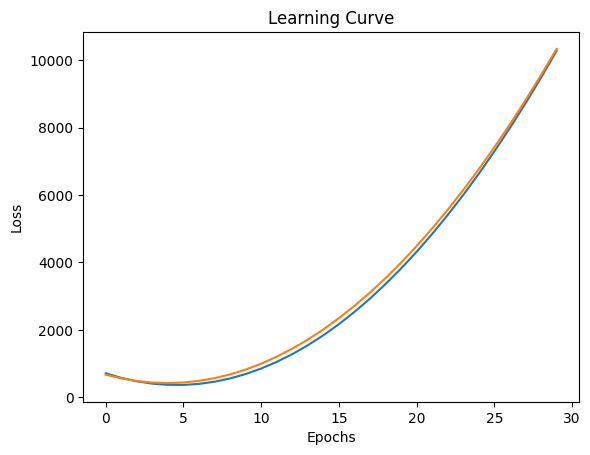

In [269]:
plot_learning_curve(h)

#Réseau de neurones simple

In [60]:
sigmoid = Sigmoid()
model =  Model(layers = [Dense(neurons=3, activation=sigmoid),
       Dense(neurons=1)])
mse = Loss()
model.compile(loss=mse, learning_rate=0.0001)

In [61]:
h = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

Epoch 1 .............. loss : 507.9248956497336  ....val_loss : 492.311693850643
Epoch 2 .............. loss : 385.89495140692316  ....val_loss : 373.51017069117904
Epoch 3 .............. loss : 291.17619082017  ....val_loss : 281.7732417488408
Epoch 4 .............. loss : 219.75979260483584  ....val_loss : 213.27980491645158
Epoch 5 .............. loss : 168.45961161605925  ....val_loss : 164.89930377159283
Epoch 6 .............. loss : 132.08416055931372  ....val_loss : 131.23235818984935
Epoch 7 .............. loss : 106.37686490362891  ....val_loss : 107.68580089711702
Epoch 8 .............. loss : 88.20382268012803  ....val_loss : 91.17465167251936
Epoch 9 .............. loss : 75.3310635935989  ....val_loss : 79.86033890727212
Epoch 10 .............. loss : 66.19183019020247  ....val_loss : 72.3635639728097
Epoch 11 .............. loss : 59.631502712403254  ....val_loss : 67.45066259302294
Epoch 12 .............. loss : 54.86506266243943  ....val_loss : 64.19452812522401
Epoch 1

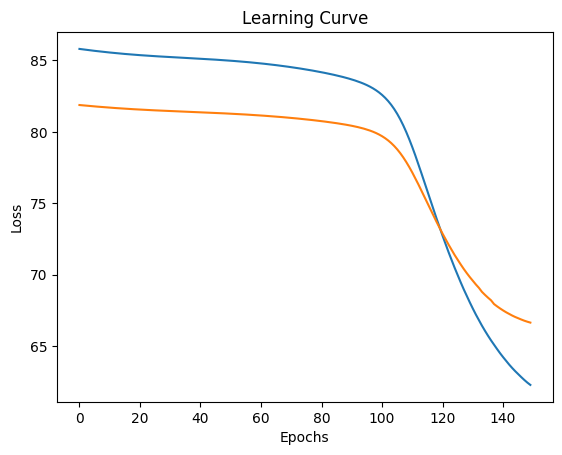

In [67]:
plot_learning_curve(h)

# Deep Neural Network

In [63]:
sigmoid = Sigmoid()
model = Model([ Dense(neurons=13, activation=sigmoid),
               Dense(neurons=10, activation=sigmoid),
               Dense(neurons=5, activation=sigmoid),
               Dense(neurons=1),

                ])

In [64]:
model

Layers ................. 
 DenseLayer(neurons=13) avec Sigmoid 
 DenseLayer(neurons=10) avec Sigmoid 
 DenseLayer(neurons=5) avec Sigmoid 
 DenseLayer(neurons=1)

In [66]:
mse = Loss()
model.compile(loss=mse, learning_rate=0.0001)
h = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

<ipython-input-13-d2d29957a7c7>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-1 * self.inputs))


Epoch 1 .............. loss : 85.80773718977571  ....val_loss : 81.87937780946658
Epoch 2 .............. loss : 85.77955529545885  ....val_loss : 81.85913799596521
Epoch 3 .............. loss : 85.75204145868435  ....val_loss : 81.83934911142985
Epoch 4 .............. loss : 85.7252012247303  ....val_loss : 81.82001417282846
Epoch 5 .............. loss : 85.69903943490804  ....val_loss : 81.80113534581632
Epoch 6 .............. loss : 85.67356000398715  ....val_loss : 81.78271738789957
Epoch 7 .............. loss : 85.64876549689971  ....val_loss : 81.76476512500399
Epoch 8 .............. loss : 85.62465689142424  ....val_loss : 81.74727451739477
Epoch 9 .............. loss : 85.60123765659418  ....val_loss : 81.73024605074885
Epoch 10 .............. loss : 85.57849312502017  ....val_loss : 81.71367848923887
Epoch 11 .............. loss : 85.55637965863309  ....val_loss : 81.69756910610937
Epoch 12 .............. loss : 85.53495942274186  ....val_loss : 81.68191444243354
Epoch 13 .....

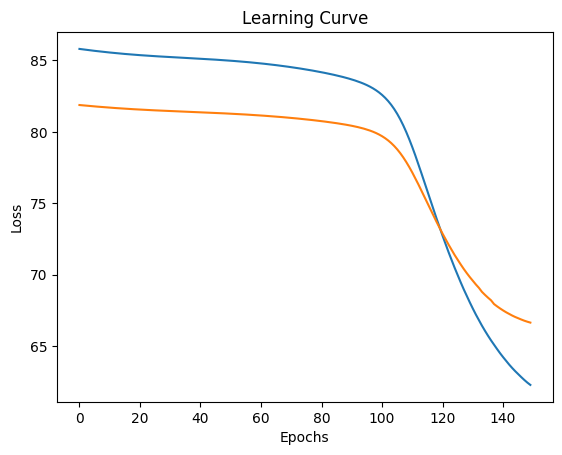

In [68]:
plot_learning_curve(h)

# Comparaison Tensorflow

In [371]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential([Dense(units=3, activation='sigmoid'),
                    Dense(units=5, activation='sigmoid'),
                    Dense(units=1)])
model.compile(optimizer=SGD(learning_rate=0.01), loss='mse')
history = model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step - loss: 0.7390
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7382
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7375
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7368
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7361
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7355
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7350
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7344
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7339
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.7335
